In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [218]:
def normalize(psi,dx):
    return psi/np.sqrt(sum(abs(psi)**2*dx))
def string_to_complex(s):
    return complex(s.replace('i', 'j'))
string_to_complex_v = np.vectorize(string_to_complex)

0.9999999999999998
1.0


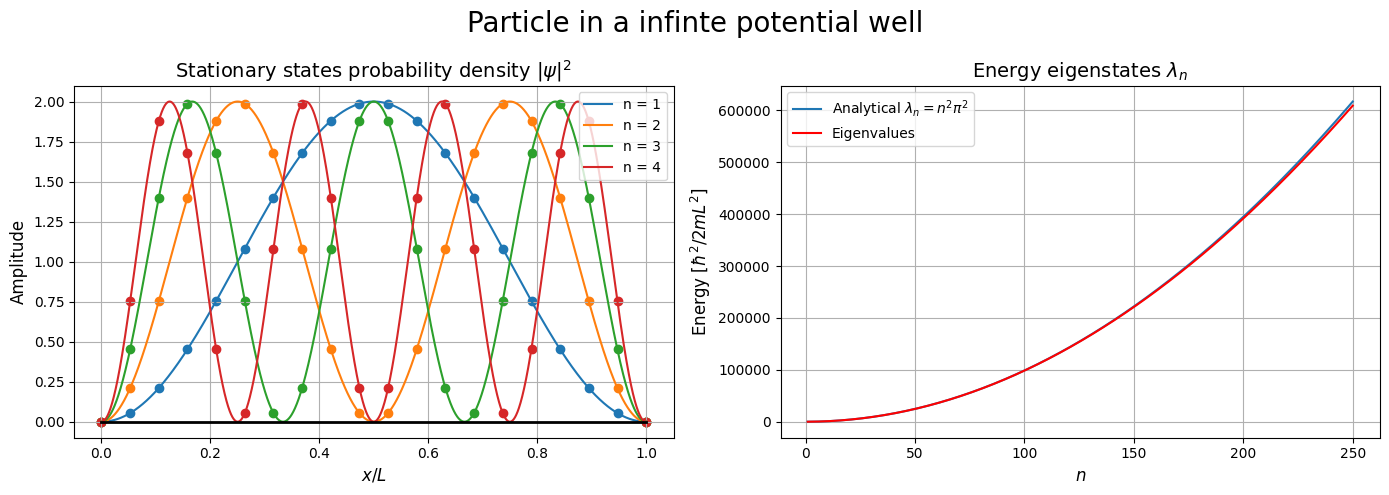

In [219]:
data = pd.read_csv('../data/raw/eigenvectors_infwell.csv', header=None)
eigenvectors = data.to_numpy()

# Determine the number of points and create a position array
N = eigenvectors.shape[0]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]
x_an = np.linspace(0, 1, 20)  # +2 to include the boundaries

plt.figure(figsize=(14, 5))
plt.tight_layout()
plt.subplot(1, 2, 1)
for i in range(min(4, eigenvectors.shape[1])):  # Plot the first 5 eigenvectors
    eigenvectors[:,i] = normalize(eigenvectors[:,i], dx)
    plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,i], 0), 0, 0))**2, label=f'n = {i+1}')

plt.plot([0, 1], [0, 0], color='k', linewidth=2)
plt.scatter(x_an, np.abs(np.sin(np.pi*x_an)*np.sqrt(2))**2)
plt.scatter(x_an, np.abs(np.sin(2*np.pi*x_an)*np.sqrt(2))**2)
plt.scatter(x_an, np.abs(np.sin(3*np.pi*x_an)*np.sqrt(2))**2)
plt.scatter(x_an, np.abs(np.sin(4*np.pi*x_an)*np.sqrt(2))**2)

plt.title('Stationary states probability density $|\psi|^2$', fontsize = 14)
plt.xlabel('$x/L$', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)
plt.legend()
plt.grid(True)

print(np.sqrt(np.sum(dx*abs(eigenvectors[:, i])**2)))
print(np.sum(((np.sin(np.pi*x)*np.sqrt(2))**2)*dx))

data = pd.read_csv('../data/raw/eigenvalues_infwell.csv', header=None)
eigenvalues = data.to_numpy()
plt.subplot(1, 2, 2)
n = eigenvalues.shape[0]
n_arr = np.linspace(1, n, n)
plt.title("Energy eigenstates $\lambda_n$", fontsize = 14)
plt.plot(n_arr, (n_arr*np.pi)**2, label = "Analytical $\lambda_n = n^2 \pi^2$")
plt.plot(n_arr, eigenvalues, color = 'red', label = "Eigenvalues")
plt.xlabel('$n$', fontsize = 12)
plt.ylabel("Energy [$\hbar^2/2mL^2}$]", fontsize =12)
plt.legend()
plt.grid(True)
plt.suptitle("Particle in a infinte potential well", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/stationary_box.png")



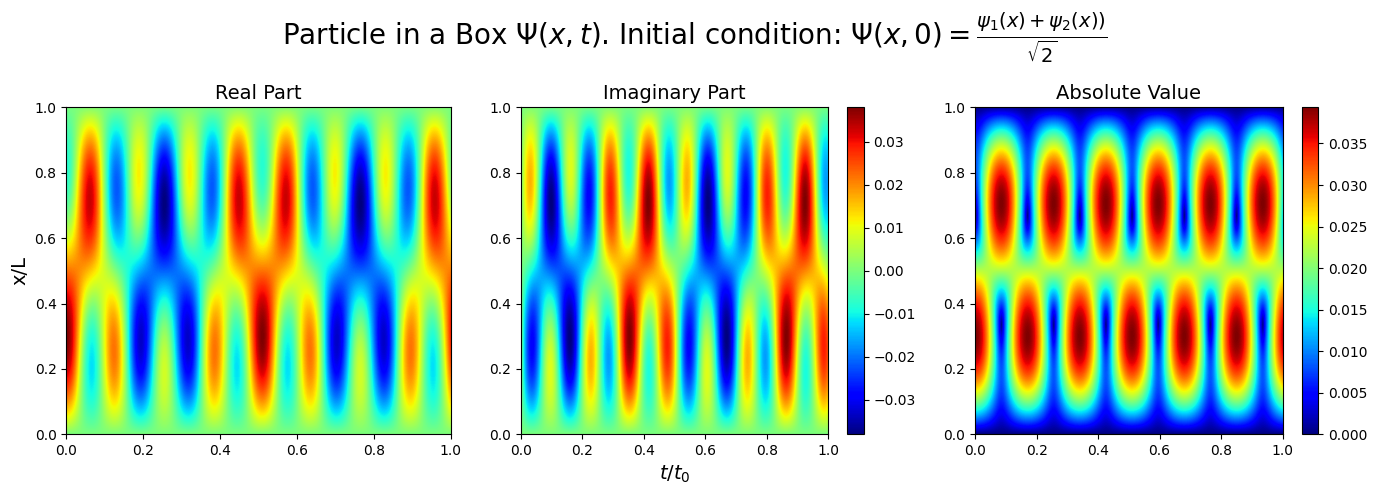

In [220]:
data = pd.read_csv('../data/raw/wavefunctions.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,1,0,1))
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,1,0,1))
plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t/t_0$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,1,0,1))
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}} $", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/particle_box.png")
plt.show()


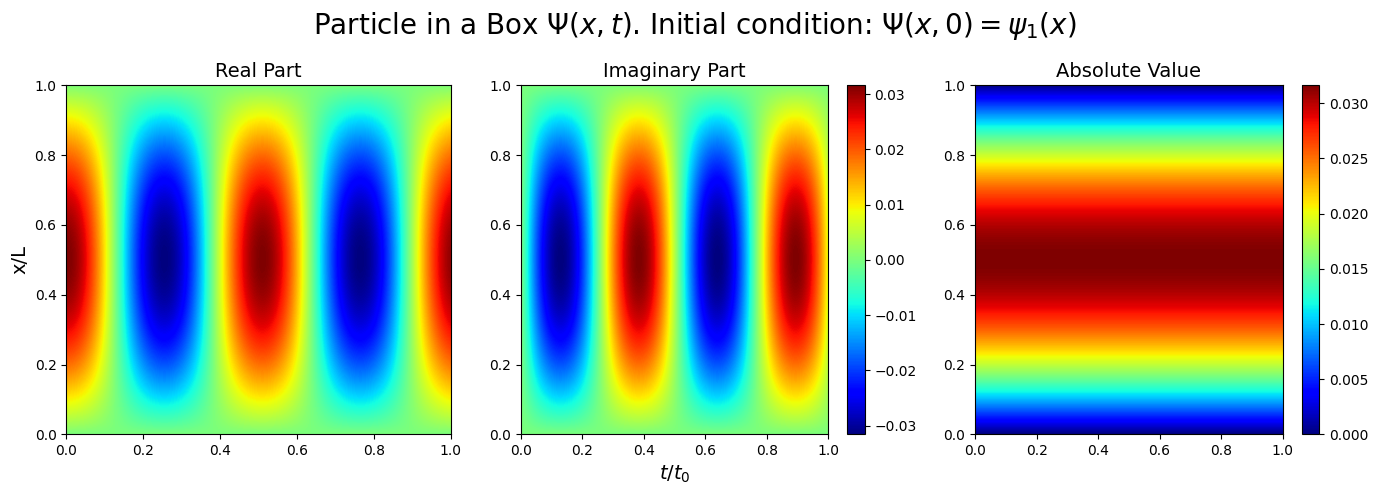

In [221]:
data = pd.read_csv('../data/raw/wavefunction_boring.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,1,0,1))
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,1,0,1))
plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t/t_0$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,1,0,1))
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \psi_1(x) $", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/particle_box_boring.png")
plt.show()


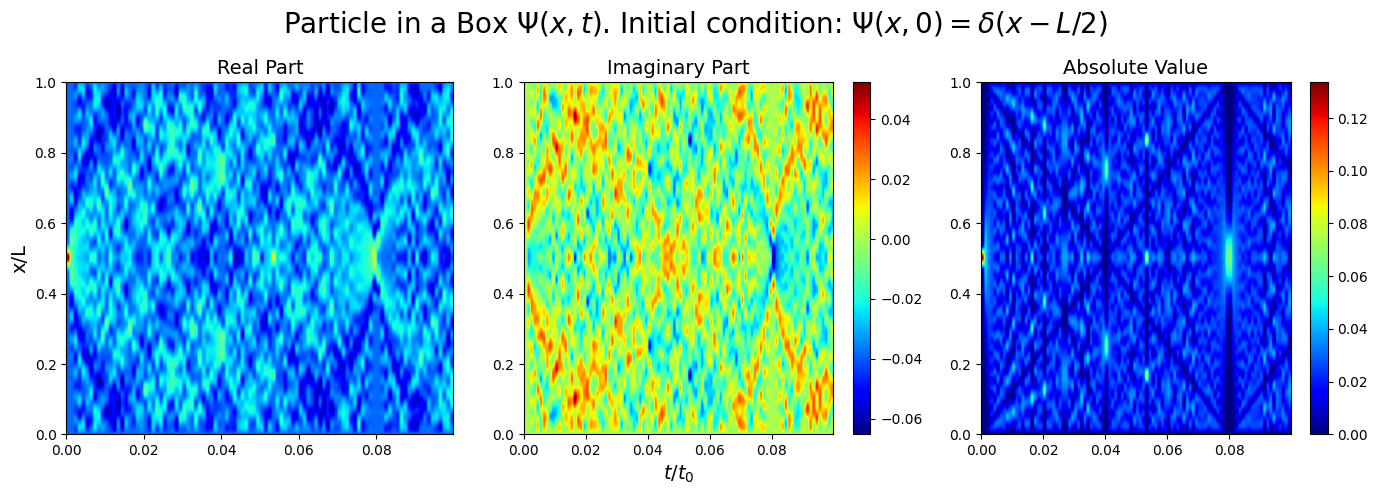

In [222]:
data = pd.read_csv('../data/raw/wavefunction_delta.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:100].real
imag_parts = data[:,0:100].imag

N = real_parts.shape[0]
M = data.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,t[100],0,1))
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,t[100],0,1))
plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t/t_0$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,t[100],0,1))
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)


plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \delta(x-L/2) $", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/delta_in_box.png")
plt.show()

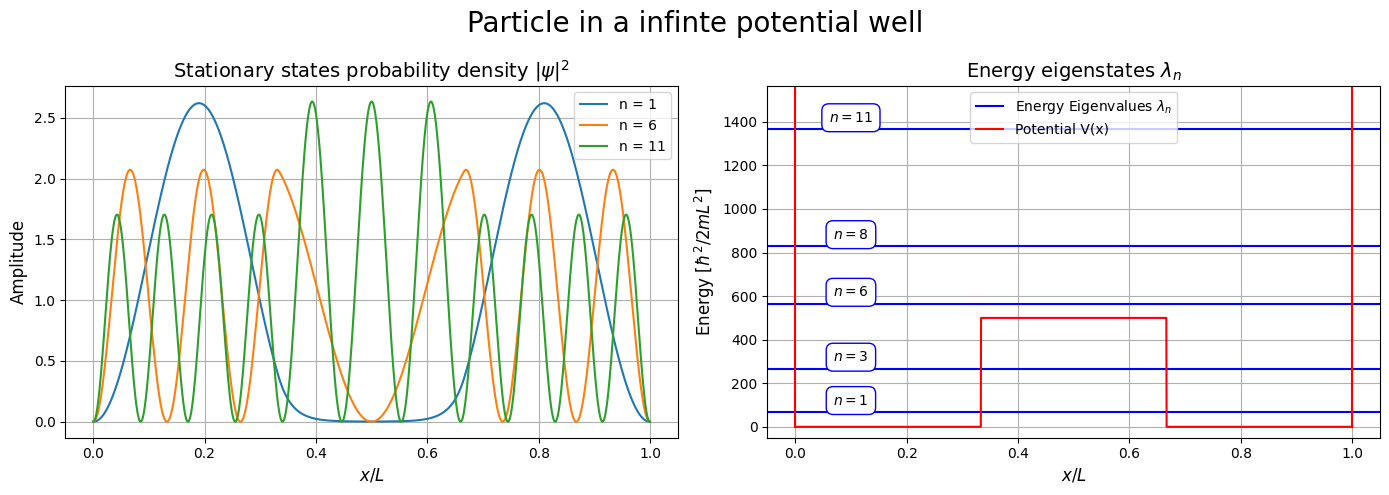

In [272]:
data = pd.read_csv('../data/raw/eigenvectors_barrier500.csv', header=None)
eigenvectors = data.to_numpy()

# Determine the number of points and create a position array
N = eigenvectors.shape[0]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]
x_an = np.linspace(0, 1, 20)  # +2 to include the boundaries

plt.figure(figsize=(14, 5))
plt.tight_layout()
plt.subplot(1, 2, 1)

eigenvectors[:,0] = normalize(eigenvectors[:,0], dx)
plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,0], 0), 0, 0))**2, label=f'n = 1')
eigenvectors[:,5] = normalize(eigenvectors[:,5], dx)
plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,5], 0), 0, 0))**2, label=f'n = 6')
eigenvectors[:,10] = normalize(eigenvectors[:,10], dx)
plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,10], 0), 0, 0))**2, label=f'n = 11')

plt.title('Stationary states probability density $|\psi|^2$', fontsize = 14)
plt.xlabel('$x/L$', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)
plt.legend()
plt.grid(True)

data = pd.read_csv('../data/raw/eigenvalues_barrier500.csv', header=None)
eigenvalues = data.to_numpy()

data = pd.read_csv('../data/raw/potential_barrier500.csv', header=None)
V = data.to_numpy()
x = np.linspace(0,1,V.shape[0])

vertical_offset = 20

plt.subplot(1, 2, 2)
plt.title("Energy eigenstates $\lambda_n$", fontsize = 14)

plt.axhline(eigenvalues[0], label = "Energy Eigenvalues $\lambda_n$", color = "blue")
plt.text(0.1, eigenvalues[0] + vertical_offset, f'$n = 1$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[2], color = "blue")
plt.text(0.1, eigenvalues[2] + vertical_offset, f'$n = 3$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[5], color = "blue")
plt.text(0.1, eigenvalues[5] + vertical_offset, f'$n = 6$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[7], color = "blue")
plt.text(0.1, eigenvalues[7] + vertical_offset, f'$n = 8$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[10], color = "blue")
plt.text(0.1, eigenvalues[10] + vertical_offset, f'$n = 11$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('$x/L$', fontsize = 12)
plt.ylabel("Energy [$\hbar^2/2mL^2}$]", fontsize =12)
plt.ylim(-50, eigenvalues[10]+200)
plt.plot(x, V, color = "red", label = "Potential V(x)" )
plt.plot([0,0],[0,10000], color = "red")
plt.plot([1,1],[0,10000], color = "red")

plt.legend()
plt.grid(True)
plt.suptitle("Particle in a infinte potential well", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/stationary_box_barrier1000.png")


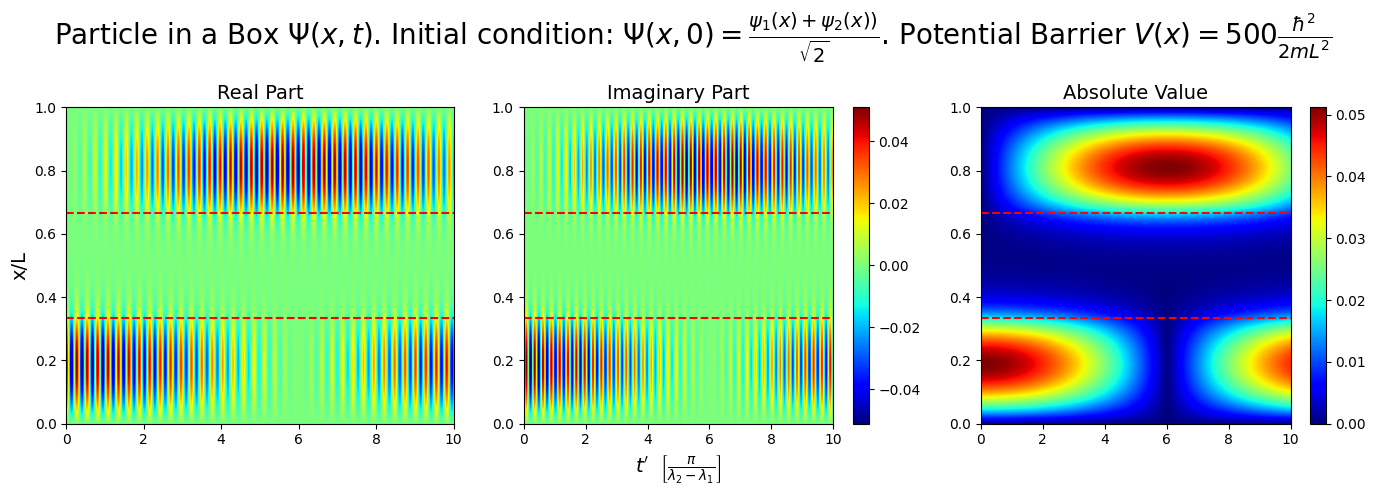

In [279]:
data = pd.read_csv('../data/raw/wavefunction_barrier500_10T.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')

plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t'$  $\left[\\frac{\pi}{\lambda_2-\lambda_1}\\right]$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}} $. Potential Barrier $V(x) = 500 \\frac{\hbar^2}{2mL^2}$ ", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/wavefunction_barrier500_10T.png")
plt.show()
